# Fast AI Tabular: Regression
Fast AI is a deep learning library built on top of PyTorch, designed to make it easier and faster to develop and train deep learning models.

In this section I used FastAI to implement regression on a tabular dataset where the 'X' features are buisiness Key Performance Indicators and the 'y' target Total Environmental Intensity (Revenue) is an estimate of the Total Environmental Cost divided by Revenue for that company.

## Imports

In [62]:
import pandas as pd
import numpy as np
# importing libraries for use with fast-ai
# -- uncomment if using within google colab env --
#import fastbook 
#fastbook.setup_book()
#from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
import sklearn
from IPython.display import Image, display_svg, SVG


## The Data

In [70]:
corp_env_impact_3pct = pd.read_csv('../../data/tabular_data/final_raw_sample_3_percent.csv')

There are two datasets. Each one has its' own unique rows based on the application of uncertainty estimates of 0 and 3 percent in the calculations of environmental cost. They both have similar column features. According to the data source, these features are the impact of buisnesses on eight "safeguard subjects":
1. Human Health (Working Capacity): Working Capacity captures human health effects from climate change, air pollution, and toxicity.
2. Crop Production : captures soil degradation, air pollution, climate change, and land use.
3. Meat Production Capacity: includes soil degradation, climate change, land use, and toxicity.
4. Fish Production Capacity: includes acidification, eutrophication, climate change, and toxicity.
5. Wood Production Capacity: includes climate change, air pollution, and land use.
6. Drinking Water & Irrigation Water (Water Production Capacity): captures climate change, land use, and water pollution.
7. Abiotic Resources: includes environmental impacts from mining.
8. Biodiversity: captures land use and toxicity.

The dataset also includes further uncertainty estimates that may increase the accuracy of the model, but for the purposes of this assignment, we will stick to these eight. I will also be using the data that includes uncertainty estimates (3 percent discount rate).

In [71]:
corp_env_impact_3pct.head()

,Year,Company Name,Country,Industry (Exiobase),Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,% Imputed
0,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediation (67),-1.62%,-25.12%,"(3,10,59,488)","(69,39,394)","(1,763)","(90,516)","(21,094)",(310),"(3,850)","(2,40,03,212)",652,0%
1,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediation (67),-0.46%,-4.28%,"(2,35,30,704)","(1,75,76,865)","(4,191)","(2,34,020)","(54,603)",(766),"(3,661)","(56,57,645)","1,047",1%
2,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediation (67),-0.32%,-2.13%,"(2,20,83,908)","(1,83,85,456)","(4,273)","(2,43,627)","(56,860)",(783),"(3,489)","(33,90,060)",639,0
3,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediation (67),-0.55%,-3.39%,"(1,97,43,336)","(1,93,12,582)","(4,522)","(2,56,694)","(60,089)",(820),"(3,428)","(1,05,662)",461,1%
4,2018,THOMSON REUTERS CORP,Canada,Activities auxiliary to financial intermediation (67),-0.26%,-1.91%,"(1,42,55,905)","(91,62,390)","(3,149)","(1,26,821)","(28,623)",(597),"(1,94,781)","(47,45,756)","6,212",18%


In [72]:
corp_env_impact_3pct.shape

(13177, 16)

# Pre-processing

 It is mentioned in the kaggle source that "Each safeguard subject is made up of multiple impact categories and indicators, called state indicators, for measuring the current state of each safeguard subject (Life Cycle Initiative 2016; Steen and Palander 2016)."

Guidance given in the Kaggle source:

'y' target:

- Total Environmental Intensity (Revenue): The monetized environmental impact of the firm's operations during the specific year indicated in column A divided by revenue in that year.

'X' features: 

- Column H: Working Capacity captures human health effects from climate change, air pollution, and toxicity.
- Column I: Fish Production Capacity includes acidification, eutrophication, climate change, and toxicity.
- Column J: Crop Production Capacity captures soil degradation, air pollution, climate change, and land use.
- Column K: Meat Production Capacity includes soil degradation, climate change, land use, and toxicity.
- Column L: Biodiversity captures land use and toxicity.
- Column M: Abiotic Resources includes environmental impacts from mining.
- Column N: Water production capacity captures climate change, land use, and water pollution.
- Column O: Wood Production Capacity includes climate change, air pollution, and land use.




## Cleaning safeguard subjects

In [73]:
def clean_numeric_text(df, column_name):
    print(column_name)
    # Remove parentheses and commas
    df[column_name] = df[column_name].str.replace(r'[\(\),]', '', regex=True)
    # Convert to integer data type
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')

In [74]:
env_features = corp_env_impact_3pct.iloc[:, 7: 15]

In [75]:
env_features['Year'] = corp_env_impact_3pct.Year
env_features['target'] = corp_env_impact_3pct['Total Environmental Intensity (Operating Income)']

In [76]:
env_features.head()

,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,Year,target
0,"(69,39,394)","(1,763)","(90,516)","(21,094)",(310),"(3,850)","(2,40,03,212)",652,2018,-25.12%
1,"(1,75,76,865)","(4,191)","(2,34,020)","(54,603)",(766),"(3,661)","(56,57,645)","1,047",2018,-4.28%
2,"(1,83,85,456)","(4,273)","(2,43,627)","(56,860)",(783),"(3,489)","(33,90,060)",639,2018,-2.13%
3,"(1,93,12,582)","(4,522)","(2,56,694)","(60,089)",(820),"(3,428)","(1,05,662)",461,2018,-3.39%
4,"(91,62,390)","(3,149)","(1,26,821)","(28,623)",(597),"(1,94,781)","(47,45,756)","6,212",2018,-1.91%


In [77]:
# removing paranthesis and commas from columns 
for column in list(env_features.iloc[:, 0:8].columns):
    clean_numeric_text(env_features, column)



Working Capacity
Fish Production Capacity
Crop Production Capacity
Meat Production Capacity
Biodiversity
Abiotic Resources
Water production capacity (Drinking water & Irrigation Water)
Wood Production Capacity


In [78]:
def text_percent_to_numeric(text_percent):
    if isinstance(text_percent, type(np.nan)):
        return np.nan
    # Remove percentage sign and convert to float
    numeric_value = float(text_percent.strip('%'))
    # Convert to decimal representation
    numeric_value /= 100
    return numeric_value

In [79]:
env_features['target'] = env_features.target.apply(lambda x: text_percent_to_numeric(x))

In [80]:
env_features.head()

,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,Year,target
0,6939394,1763,90516,21094,310,3850.0,24003212,652.0,2018,-0.2512
1,17576865,4191,234020,54603,766,3661.0,5657645,1047.0,2018,-0.0428
2,18385456,4273,243627,56860,783,3489.0,3390060,639.0,2018,-0.0213
3,19312582,4522,256694,60089,820,3428.0,105662,461.0,2018,-0.0339
4,9162390,3149,126821,28623,597,194781.0,4745756,6212.0,2018,-0.0191


## Processing with FastAI

In [85]:
env_features.Year.value_counts(normalize=True) # we will create a training condition using data before 2018

Year
2017    0.135539
2018    0.134856
2016    0.131138
2015    0.122334
2014    0.113000
2013    0.105411
2012    0.096456
2011    0.084921
2010    0.076345
Name: proportion, dtype: float64

In [91]:
year_cond = (env_features.Year<2018)
train_idx = np.where( year_cond)[0]
valid_idx = np.where(~year_cond)[0]
splits = (list(train_idx),list(valid_idx))

In [86]:
cont_names = list(env_features.columns)[:-1]
cont_names

['Working Capacity',
 'Fish Production Capacity',
 'Crop Production Capacity',
 'Meat Production Capacity',
 'Biodiversity',
 'Abiotic Resources',
 'Water production capacity (Drinking water & Irrigation Water)',
 'Wood Production Capacity',
 'Year']

In [105]:
env_features.target = env_features.target.fillna(env_features.target.mean())

In [106]:
# Instantiate a TabularPandas object with the FillMissing preprocessing step
procs = [FillMissing, Normalize]
fastai_env_features = Tabular(env_features, cont_names = cont_names, y_names = ['target'], procs=procs, splits=splits)

In [107]:
print(len(fastai_env_features.valid), len(fastai_env_features.train))

1777 11400


# Training a Regression Model

In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
# creating our train and test set
xs,y = fastai_env_features.train.xs,fastai_env_features.train.y
valid_xs,valid_y = fastai_env_features.valid.xs,fastai_env_features.valid.y

In [110]:
regressor_model = AdaBoostRegressor()

In [111]:
regressor_model.fit(xs, y)

AdaBoostRegressor()

In [113]:
validation_predictions = regressor_model.predict(valid_xs)

In [115]:
valid_xs['predictions'] = validation_predictions

In [116]:
valid_xs['target'] = valid_y

In [119]:
valid_xs.loc[:, ['predictions', 'target']]

,predictions,target
0,-3.601268,-0.2512
1,-3.601268,-0.0428
2,-3.601268,-0.0213
3,-3.601268,-0.0339
4,-3.601268,-0.0191
...,...,...
1772,-4.219667,-3.3184
1773,-4.219667,-0.0716
1774,-3.601268,-0.0067
1775,-3.601268,-0.1722


# Evaluating the Model

In [123]:
import sklearn.metrics

The model is showing a negative RMSE which should technically not be possible as a root is applied to the mean squared error which should return a non-negative value. However, since this is negative, it means the model may be fitting the data badly. This was my initial hypothesis during the preprocessing step when I was reading the research paper where the data description for the "safeguard subject" features mentioned it includes multiple metrics within it. I assumed that the tuple with commas seperating each value where the different metrics, however, I just assumed it could be a single value and simply removed the paranthesis and commas instead of splitting it subject into multiple features (as even considering the tuples were different metrics, each subject varied in its n-tuple structure - meaning more data preparation is necessary). This may have had the unintended effect of skewing the data distributions and introducing noise.

The sources for this data do not document the data CSV used in this notebook explicitly (i.e how to preprocess it). In the future I would consider a deep-sets or a graph based regression model that captures the multiplicity of the tuple data features.

In [130]:
# Root mean squared error
rmse_score = sklearn.metrics.(valid_xs.predictions, valid_xs.target)
print("RMSE:", rmse_score)

# mean squared error
mse_score = sklearn.metrics.mean_squared_error(valid_xs.predictions, valid_xs.target)
print("MSE:", mse_score)

RMSE: -1.7376185028222921
MSE: 1177.1415013357353


# Visualizing the Prediction line vs. the Actual line 

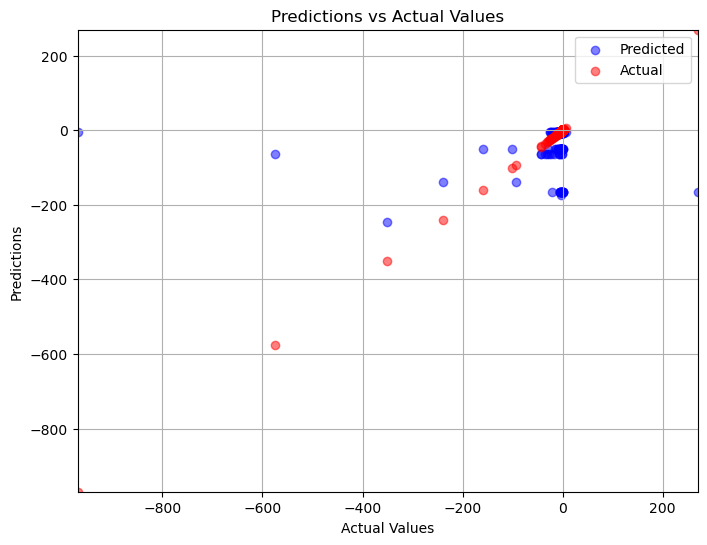

In [141]:
# Plot predictions versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(valid_xs['target'], valid_xs['predictions'], color='blue', alpha=0.5, label='Predicted')
plt.scatter(valid_xs['target'], valid_xs['target'], color='red', alpha=0.5, label='Actual')  # Actual values in red
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
# Set the limits of x-axis and y-axis to correspond to the full data range
xmin = min(np.min(valid_xs['target']), np.min(valid_xs['predictions']))
xmax = max(np.max(valid_xs['target']), np.min( valid_xs['predictions']))
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)

plt.legend()
plt.grid(True)
plt.show()